In [354]:
import requests
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.json import json_normalize
import dateutil.parser

In [355]:
api_key = 'cb6e9e04-daa4-4e54-9589-7815988c8792'
# get last available data time
capabilities_api = 'http://datapoint.metoffice.gov.uk/public/data/val/wxmarineobs/all/json/capabilities?res=hourly&key=' + api_key
capabilities_res = requests.get(capabilities_api)
capabilities_res = json.loads(capabilities_res.text)
capabilities_res = capabilities_res['Resource']['TimeSteps']['TS']
s_times = pd.Series(capabilities_res)
print('capability:', str(len(s_times)) + 'h of data available.')
s_times
#last_available = capabilities_res[-1]
#last_available

capability: 26h of data available.


0     2016-05-15T10:00:00Z
1     2016-05-15T11:00:00Z
2     2016-05-15T12:00:00Z
3     2016-05-15T13:00:00Z
4     2016-05-15T14:00:00Z
5     2016-05-15T15:00:00Z
6     2016-05-15T16:00:00Z
7     2016-05-15T17:00:00Z
8     2016-05-15T18:00:00Z
9     2016-05-15T19:00:00Z
10    2016-05-15T20:00:00Z
11    2016-05-15T21:00:00Z
12    2016-05-15T22:00:00Z
13    2016-05-15T23:00:00Z
14    2016-05-16T00:00:00Z
15    2016-05-16T01:00:00Z
16    2016-05-16T02:00:00Z
17    2016-05-16T03:00:00Z
18    2016-05-16T04:00:00Z
19    2016-05-16T05:00:00Z
20    2016-05-16T06:00:00Z
21    2016-05-16T07:00:00Z
22    2016-05-16T08:00:00Z
23    2016-05-16T09:00:00Z
24    2016-05-16T10:00:00Z
25    2016-05-16T11:00:00Z
dtype: object

In [356]:
marine_obs_api = 'http://datapoint.metoffice.gov.uk/public/data/val/wxmarineobs/all/json/62029?res=hourly&key=' + api_key
# use timestamp to get the right one! &time=<TS>
#marine_obs_api = 'http://datapoint.metoffice.gov.uk/public/data/val/wxmarineobs/all/json/62029?res=hourly&key=' + api_key + '&time=' + s_times.iloc[-1] 
marine_obs_res = requests.get(marine_obs_api)
marine_obs_res = json.loads(marine_obs_res.text)
print( json.dumps(marine_obs_res, indent=4) )

{
    "SiteRep": {
        "DV": {
            "Location": {
                "lat": "48.72",
                "Period": [
                    {
                        "Rep": [
                            {
                                "Dp": "10.5",
                                "St": "12.7",
                                "Wp": "6.0",
                                "T": "11.7",
                                "D": "WNW",
                                "P": "1026",
                                "H": "92.3",
                                "S": "2",
                                "$": "660",
                                "Wh": "1.1"
                            },
                            {
                                "Dp": "10.8",
                                "St": "12.8",
                                "Wp": "6.0",
                                "T": "12.1",
                                "D": "WSW",
                                "P": "1026",
                

In [357]:
#marine_obs_res
days = marine_obs_res['SiteRep']['DV']['Location']['Period']
print("data contains", len(days), "days.")
day_1 = days[0]['Rep']
print("day 1 has", len(day_1), "entries.")
df_day1 = json_normalize(day_1)

if len(days) > 1:
    day_2 = days[1]['Rep']
    print("day 2 has", len(day_2), "entries.")
    df_day2 = json_normalize(day_2)
else:
    df_day2 = df_day1.iloc[0:0]

data contains 2 days.
day 1 has 13 entries.
day 2 has 12 entries.


In [358]:
df_days = pd.concat([df_day1, df_day2], ignore_index=True)
#df_days = df_day2

print(str(len(df_days)) + 'h of data available')
print(str(len(s_times)) + 'h of data promised by capability')
column_name_mapping = {feature['name'] : feature['$'].lower().replace(" ", "_") for feature in marine_obs_res['SiteRep']['Wx']['Param']  }
df_days.rename(columns=column_name_mapping, inplace=True)
#df_days_with_time = df_days.merge(s_times)
#df_days_with_time
df_days

25h of data available
26h of data promised by capability


,$,wind_direction,dew_point,screen_relative_humidity,pressure,wind_speed,sea_temperature,temperature,wave_height,wave_period
0,660,WNW,10.5,92.3,1026,2,12.7,11.7,1.1,6.0
1,720,WSW,10.8,91.6,1026,4,12.8,12.1,1.1,6.0
2,780,SW,10.6,89.2,1026,4,12.9,12.3,1.1,7.0
3,840,SW,10.6,88.7,1026,4,12.8,12.4,1.0,6.0
4,900,SW,10.7,88.1,1026,4,12.9,12.6,0.9,6.0
5,960,SW,10.9,89.3,1026,6,12.9,12.6,1.1,7.0
6,1020,SW,11.2,91.7,1025,6,12.8,12.5,1.1,7.0
7,1080,SW,11.1,90.5,1025,5,12.9,12.6,1.1,7.0
8,1140,SW,11.1,89.9,1025,6,12.9,12.7,1.1,7.0
9,1200,SW,11.4,91.1,1025,4,13.0,12.8,1.1,7.0


In [359]:
# for some reason, the capability API has more dates available - unclear!
first_entry_hour = int(int(df_days.iloc[0][0]) / 60)
last_entry_hour = int(int(df_days.iloc[-1][0]) / 60)
if len(df_days) != len(s_times):
    s_times_conv = [dateutil.parser.parse(dt) for dt in s_times]
    first_corresponding_index = next( i for i,dt in enumerate(s_times_conv) if dt.hour == first_entry_hour )
    last_corresponding_index = len(s_times_conv) - next( i for i,dt in enumerate(reversed(s_times_conv)) if dt.hour == last_entry_hour )
    s_times_fixed = pd.Series([dt.isoformat() for dt in s_times_conv[first_corresponding_index:last_corresponding_index]])
    s_times_fixed.index = range(len(s_times_fixed))
    print('use indexes',first_corresponding_index, 'to', last_corresponding_index)
else:
    s_times_fixed = s_times

df_days.index = s_times_fixed
df_days

use indexes 1 to 26


,$,wind_direction,dew_point,screen_relative_humidity,pressure,wind_speed,sea_temperature,temperature,wave_height,wave_period
2016-05-15T11:00:00+00:00,660,WNW,10.5,92.3,1026,2,12.7,11.7,1.1,6.0
2016-05-15T12:00:00+00:00,720,WSW,10.8,91.6,1026,4,12.8,12.1,1.1,6.0
2016-05-15T13:00:00+00:00,780,SW,10.6,89.2,1026,4,12.9,12.3,1.1,7.0
2016-05-15T14:00:00+00:00,840,SW,10.6,88.7,1026,4,12.8,12.4,1.0,6.0
2016-05-15T15:00:00+00:00,900,SW,10.7,88.1,1026,4,12.9,12.6,0.9,6.0
2016-05-15T16:00:00+00:00,960,SW,10.9,89.3,1026,6,12.9,12.6,1.1,7.0
2016-05-15T17:00:00+00:00,1020,SW,11.2,91.7,1025,6,12.8,12.5,1.1,7.0
2016-05-15T18:00:00+00:00,1080,SW,11.1,90.5,1025,5,12.9,12.6,1.1,7.0
2016-05-15T19:00:00+00:00,1140,SW,11.1,89.9,1025,6,12.9,12.7,1.1,7.0
2016-05-15T20:00:00+00:00,1200,SW,11.4,91.1,1025,4,13.0,12.8,1.1,7.0


Next, import surfline's wave reports for today.

In [360]:
surfline_api = 'http://api.surfline.com/v1/forecasts/{SPOT_ID}?resources=surf&days=1&getAllSpots=false&units=e&interpolate=false&showOptimal=false'
spot_id = 44509 # Costa da Caparica
surf_report_res = requests.get(surfline_api.replace("{SPOT_ID}",str(spot_id)))
surf_report_json = json.loads(surf_report_res.text)
print( json.dumps(surf_report_json, indent=4) )
surf_report_json = surf_report_json['Surf']

{
    "lat": "38.64036",
    "new_hd_cam": "false",
    "lon": "-9.242746",
    "timezone": 1,
    "timeZoneString": "Europe/Lisbon",
    "name": "Costa da Caparica",
    "Location": {
        "regionname": "Portugal",
        "tide_location": "Lisbon, Portugal",
        "regionalias": "portugal",
        "subregionalias": "slisbon"
    },
    "theWalue": "1960 44509",
    "_metadata": {
        "dateCreated": "May 16, 2016 04:28:54",
        "tickCount": {
            "surf": 6
        },
        "rediskey": "cache:api:forecasts:44509:1:051616:e:e:false:1:false:false:false:false:false:surf",
        "canonicalUrl": "http://www.surfline.com/surf-report/costa-da-caparica-portugal_44509/",
        "cached": "false",
        "hostname": "prod-coldfusion-api-7"
    },
    "Surf": {
        "modelCodeDisplay": "undefined",
        "swell_height3": [
            [
                1,
                1.2,
                1.4,
                1.9
            ]
        ],
        "swell_directio

The surfline result shows 4 data points for today. In Surf we can find a number of interesting attributes, including:

- **dateStamp**: for which times have the conditions been predicted
- **surf_max**: maximum wave height in meters (possible target variable)
- **surf_min**: minimum wave height in meters
- **swell_direction1-3**: direction of the swell. unit unclear
- **swell_height1-3**: height of swell. unit unclear.
- **swell_period1-3**: period of swell. unit unclear.

Each of these are an array of length 1 (= number of days requested), with arrays of four elements.
Let's remove the double array nesting to be able to create a data frame.

In [361]:
df_surf = pd.DataFrame(columns=surf_report_json)
for feature in surf_report_json:
    if type(surf_report_json[feature]) is list:
        df_surf[feature] = pd.Series(surf_report_json[feature][0])
#df_surf = json_normalize()
df_surf = df_surf.dropna(axis=1, how='all')
df_surf

,swell_height3,swell_direction2,surf_max,swell_period1,modelRun,swell_period2,swell_period3,swell_height2,swell_height1,swell_direction3,periodSchedule,dateStamp,swell_direction1,surf_min,modelCode
0,1.0,24,0.96,5.2,2016051512,5.2,9.3,2.2,4.1,285,0100,"May 16, 2016 01:00:00",340,0.00,undefined
1,1.2,24,1.02,5.2,2016051600,5.2,8.4,2.1,3.5,285,0700,"May 16, 2016 07:00:00",339,0.02,undefined
2,1.4,23,1.45,5.2,2016051600,5.2,8.4,1.8,3.2,285,1300,"May 16, 2016 13:00:00",339,0.45,undefined
3,1.9,289,2.03,5.2,2016051600,11.2,5.2,2.6,3.8,21,1900,"May 16, 2016 19:00:00",341,1.08,undefined


Let's get the date into the same format as in our buoy data.

In [362]:
today = datetime.datetime.today().replace(hour=0, minute=0, second=0, microsecond=0)
# subtract given times by 1, since Lisbon is one hour ahead
surfline_datetimes = [today.replace(hour=(1-1)), today.replace(hour=(7-1)), today.replace(hour=(13-1)), today.replace(hour=(19-1))]
df_surf.index = [datetime.datetime.isoformat(dt) + '+00:00' for dt in surfline_datetimes]
#del df_surf['dateStamp']
df_surf

,swell_height3,swell_direction2,surf_max,swell_period1,modelRun,swell_period2,swell_period3,swell_height2,swell_height1,swell_direction3,periodSchedule,dateStamp,swell_direction1,surf_min,modelCode
2016-05-16T00:00:00+00:00,1.0,24,0.96,5.2,2016051512,5.2,9.3,2.2,4.1,285,0100,"May 16, 2016 01:00:00",340,0.00,undefined
2016-05-16T06:00:00+00:00,1.2,24,1.02,5.2,2016051600,5.2,8.4,2.1,3.5,285,0700,"May 16, 2016 07:00:00",339,0.02,undefined
2016-05-16T12:00:00+00:00,1.4,23,1.45,5.2,2016051600,5.2,8.4,1.8,3.2,285,1300,"May 16, 2016 13:00:00",339,0.45,undefined
2016-05-16T18:00:00+00:00,1.9,289,2.03,5.2,2016051600,11.2,5.2,2.6,3.8,21,1900,"May 16, 2016 19:00:00",341,1.08,undefined


In [363]:
s_target = pd.Series( (df_surf['surf_max'] + df_surf['surf_min']) / 2, name='surf_avg' ) 
print(s_target)

2016-05-16T00:00:00+00:00    0.480
2016-05-16T06:00:00+00:00    0.520
2016-05-16T12:00:00+00:00    0.950
2016-05-16T18:00:00+00:00    1.555
Name: surf_avg, dtype: float64


In [364]:
df_train = pd.concat([df_days, s_target], axis=1)
df = df_train.dropna(axis=0, how='any')
df

,$,wind_direction,dew_point,screen_relative_humidity,pressure,wind_speed,sea_temperature,temperature,wave_height,wave_period,surf_avg
2016-05-16T00:00:00+00:00,0,SW,11.8,93.5,1025,5,12.8,12.8,1.1,7.0,0.48
2016-05-16T06:00:00+00:00,360,SSW,12.0,93.6,1024,8,12.7,13.0,1.2,8.0,0.52


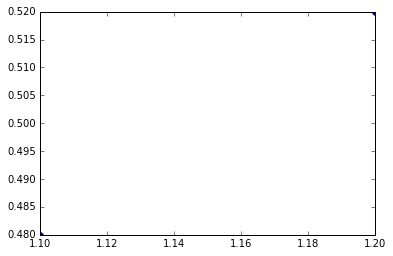

In [365]:
plt.plot(df['wave_height'], df['surf_avg'], 'bo')

In [367]:
df_complete =  pd.concat([df_days, df_surf], axis=1)
df_complete.to_csv("may_"+ str(datetime.date.today().day) + '.csv' )
df_complete.dropna()

,$,wind_direction,dew_point,screen_relative_humidity,pressure,wind_speed,sea_temperature,temperature,wave_height,wave_period,...,swell_period2,swell_period3,swell_height2,swell_height1,swell_direction3,periodSchedule,dateStamp,swell_direction1,surf_min,modelCode
2016-05-16T00:00:00+00:00,0,SW,11.8,93.5,1025,5,12.8,12.8,1.1,7.0,...,5.2,9.3,2.2,4.1,285,0100,"May 16, 2016 01:00:00",340,0.00,undefined
2016-05-16T06:00:00+00:00,360,SSW,12.0,93.6,1024,8,12.7,13.0,1.2,8.0,...,5.2,8.4,2.1,3.5,285,0700,"May 16, 2016 07:00:00",339,0.02,undefined


How to code the degrees of wind dir ?